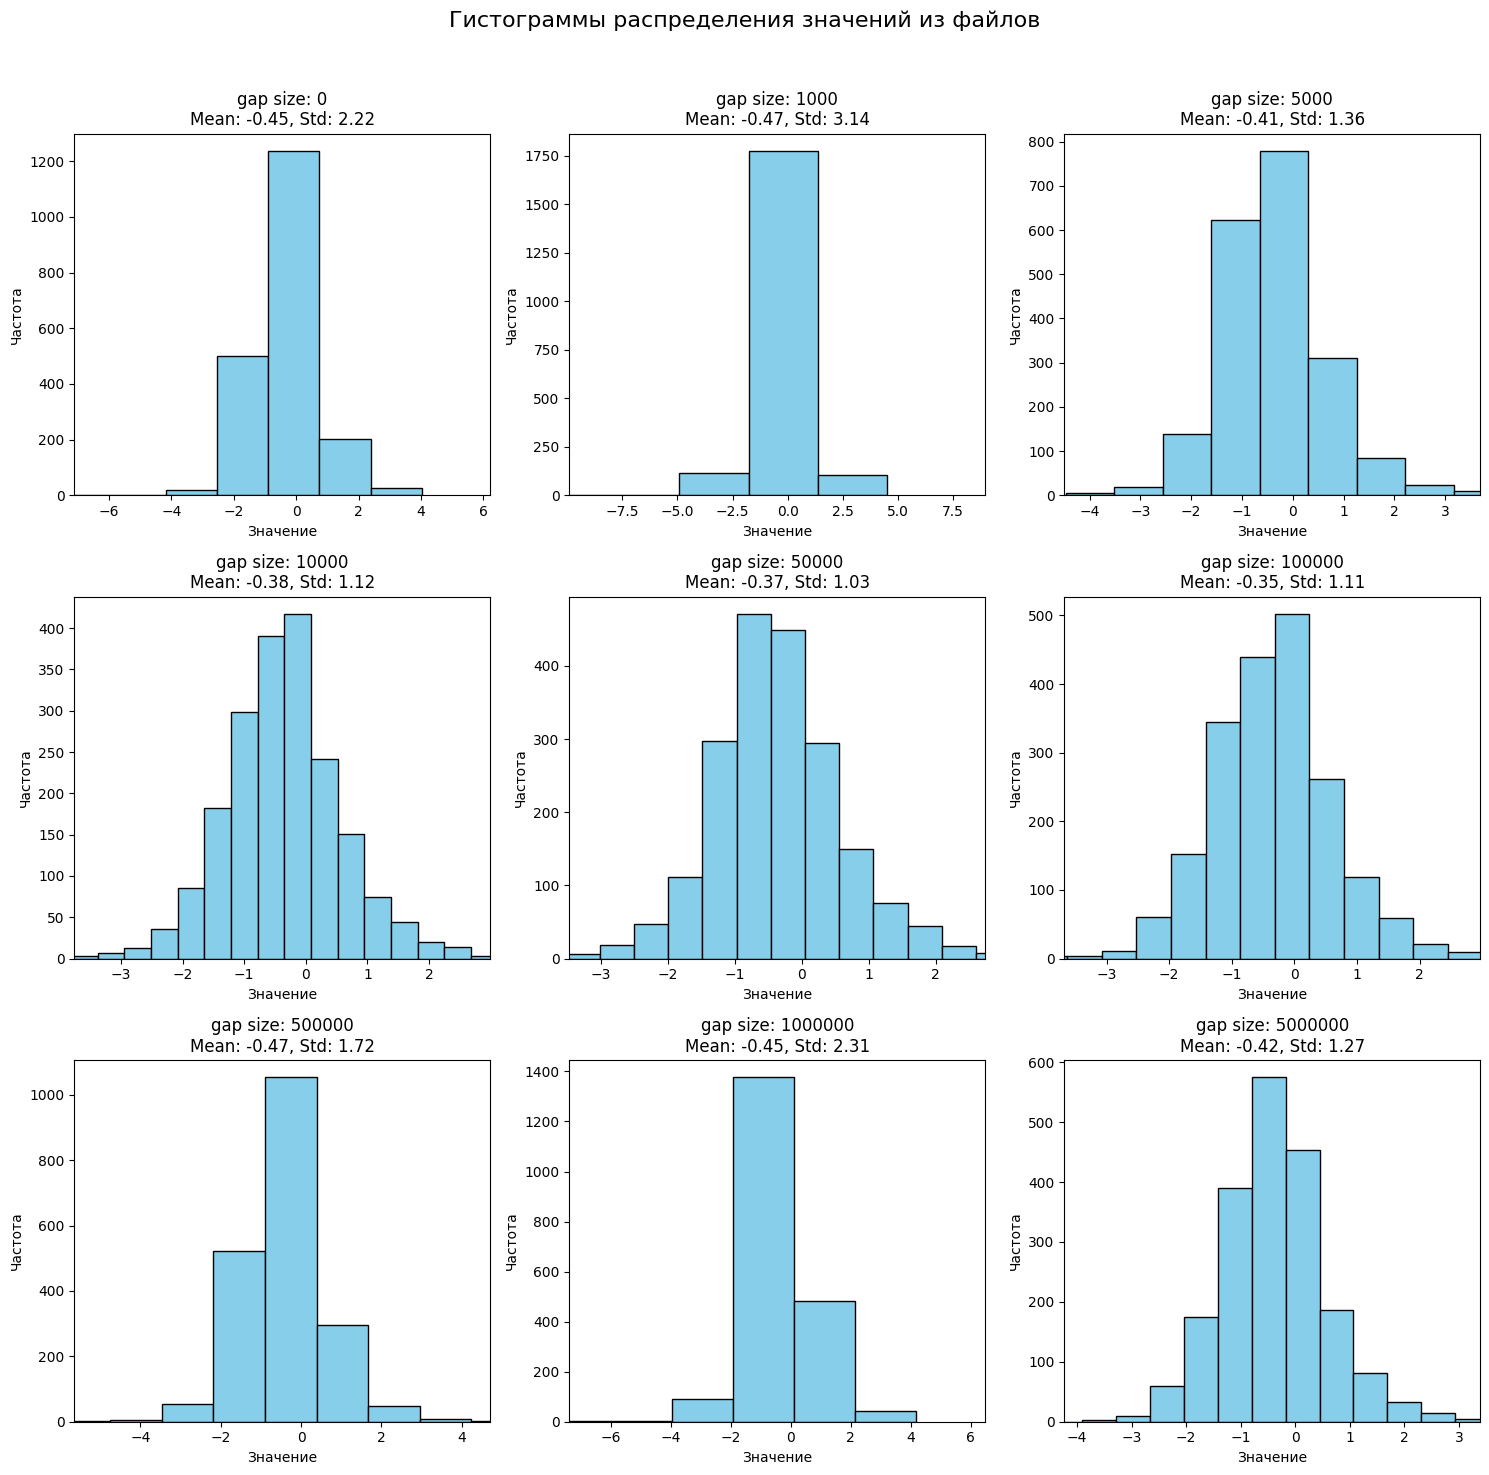

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Задаем массив gapsizes
gapsizes = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]

# Создаем фигуру для отображения субплотов
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # 3x3 для 9 файлов
fig.suptitle("Гистограммы распределения значений из файлов", fontsize=16)

# Проходим по файлам и создаем гистограммы
for i in range(9):
    # Формируем имя файла
    filename = f'gaptest_{i}.txt'
    
    # Открываем файл и читаем данные
    with open(filename, 'r') as file:
        lines = file.readlines()[1:]  # Пропускаем первую строку
        data = np.array([float(line.strip()) for line in lines])  # Преобразуем строки в float

    # Вычисляем среднее значение и стандартное отклонение
    mean_value = np.mean(data)
    std_dev = np.std(data)

    # Параметры для текущего субплота
    row, col = divmod(i, 3)  # определяем расположение на сетке 3x3
    ax = axs[row, col]

    # Построение гистограммы
    ax.hist(data, bins=40, color='skyblue', edgecolor='black')
    ax.set_title(f'gap size: {gapsizes[i]}\nMean: {mean_value:.2f}, Std: {std_dev:.2f}')
    ax.set_xlabel("Значение")
    ax.set_ylabel("Частота")
    ax.set_xlim(mean_value - 3 * std_dev, mean_value + 3 * std_dev)


# Настройка и отображение графика
plt.tight_layout(rect=[0, 0, 1, 0.96])  # оставляем место для основного заголовка
plt.show()


9
9
9


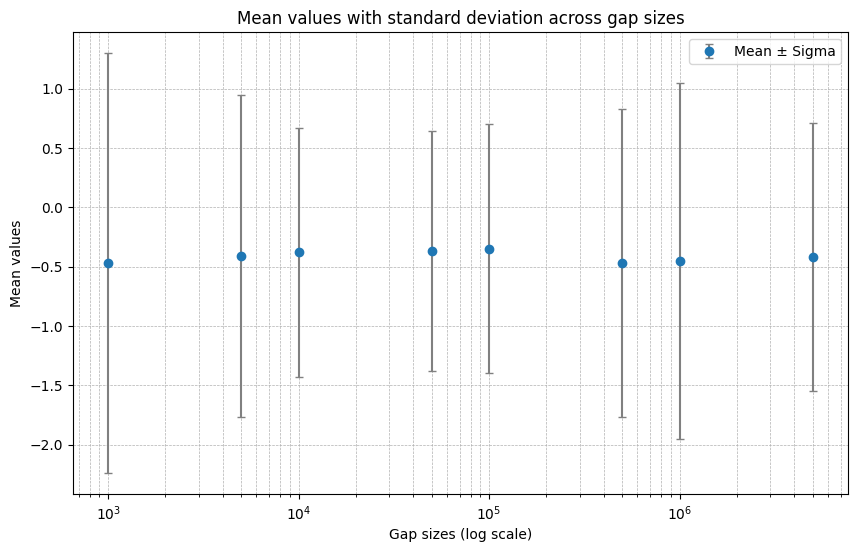

In [10]:
gapsizes = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
print(len(gapsizes))
means = [-0.38, -0.47, -0.41, -0.38, -0.37, -0.35, -0.47, -0.45, -0.42]
print(len(means))
sigmas = [1.48, 1.77, 1.36, 1.05, 1.01, 1.05, 1.3, 1.5, 1.13]
print(len(sigmas))
plt.figure(figsize=(10, 6))
plt.errorbar(gapsizes, means, yerr=sigmas, fmt='o', ecolor='gray', capsize=3, capthick=1, label="Mean ± Sigma")
plt.xscale('log')
plt.xlabel("Gap sizes (log scale)")
plt.ylabel("Mean values")
plt.title("Mean values with standard deviation across gap sizes")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()